In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import tensorflow
tensorflow.__version__

'2.4.1'

In [3]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense,Dropout
from keras.utils import np_utils

In [4]:
data = pd.read_csv('grouped_Activities.csv')

In [5]:
data.head(3)

,Unnamed: 0,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity
0,0,2021-02-15 13:50:21.550,-0.158969,2.803969,9.085058,-0.043932,-0.045130,0.045454,-19.597500,-5.601242,-41.832703,-90.007644,-15.340794,-0.056757,Sitting
1,1,2021-02-15 13:50:21.600,0.105081,2.691852,9.735305,-0.015150,0.017822,-0.039482,-19.790108,-5.628992,-41.756622,-90.030670,-15.489331,-0.163034,Sitting
2,2,2021-02-15 13:50:21.650,-0.065414,2.734813,9.690698,0.029210,-0.072317,0.006180,-19.635098,-5.536165,-42.205139,-90.047929,-15.306761,-0.206336,Sitting


In [6]:
df = data.copy()

In [7]:
df = df.dropna()

In [8]:
df.head(3)

,Unnamed: 0,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity
0,0,2021-02-15 13:50:21.550,-0.158969,2.803969,9.085058,-0.043932,-0.045130,0.045454,-19.597500,-5.601242,-41.832703,-90.007644,-15.340794,-0.056757,Sitting
1,1,2021-02-15 13:50:21.600,0.105081,2.691852,9.735305,-0.015150,0.017822,-0.039482,-19.790108,-5.628992,-41.756622,-90.030670,-15.489331,-0.163034,Sitting
2,2,2021-02-15 13:50:21.650,-0.065414,2.734813,9.690698,0.029210,-0.072317,0.006180,-19.635098,-5.536165,-42.205139,-90.047929,-15.306761,-0.206336,Sitting


In [9]:
df = df.drop("Unnamed: 0", axis=1)

In [10]:
df.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity
0,2021-02-15 13:50:21.550,-0.158969,2.803969,9.085058,-0.043932,-0.045130,0.045454,-19.597500,-5.601242,-41.832703,-90.007644,-15.340794,-0.056757,Sitting
1,2021-02-15 13:50:21.600,0.105081,2.691852,9.735305,-0.015150,0.017822,-0.039482,-19.790108,-5.628992,-41.756622,-90.030670,-15.489331,-0.163034,Sitting
2,2021-02-15 13:50:21.650,-0.065414,2.734813,9.690698,0.029210,-0.072317,0.006180,-19.635098,-5.536165,-42.205139,-90.047929,-15.306761,-0.206336,Sitting
3,2021-02-15 13:50:21.700,0.288300,2.505939,9.488469,0.007310,-0.021133,-0.040295,-19.892584,-5.790623,-41.786987,-90.010922,-15.431007,-0.321902,Sitting
4,2021-02-15 13:50:21.751,-0.041763,2.713407,9.748029,0.076889,-0.033310,-0.016419,-19.826864,-5.771675,-41.874054,-90.017554,-15.397740,-0.532236,Sitting


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9585 entries, 0 to 9584
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  9585 non-null   object 
 1   Acc_X      9585 non-null   float64
 2   Acc_Y      9585 non-null   float64
 3   Acc_Z      9585 non-null   float64
 4   AngV_X     9585 non-null   float64
 5   AngV_Y     9585 non-null   float64
 6   AngV_Z     9585 non-null   float64
 7   Mag_X      9585 non-null   float64
 8   Mag_Y      9585 non-null   float64
 9   Mag_Z      9585 non-null   float64
 10  Orin_X     9585 non-null   float64
 11  Orin_Y     9585 non-null   float64
 12  Orin_Z     9585 non-null   float64
 13  Activity   9585 non-null   object 
dtypes: float64(12), object(2)
memory usage: 1.1+ MB


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Activity_class = le.fit_transform(df['Activity'])

In [13]:
Activity_class

array([1, 1, 1, ..., 3, 3, 3])

In [14]:
Activity_class.shape

(9585,)

In [15]:
X= df.iloc[:, 1:-1].values
y = Activity_class

In [16]:
X.shape

(9585, 12)

In [17]:
y.shape

(9585,)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)



In [19]:
X.shape

(9585, 12)

In [20]:
X.shape

(9585, 12)

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [22]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [23]:
y_train

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [24]:
(12 + 4) /2

8.0

In [25]:
# Neural network Strcuture  ====  12 -> 8 -> 8 -> 4

# Initializing the ANN
network = Sequential()

# Adding the input layer and the first hidden layer
network.add(Dense(input_shape = (12,), units = 8, activation = 'relu'))
#network.add(Dropout(0.02))
#Adding the second hidden layer
network.add(Dense(units=8, activation='relu'))
##network.add(Dropout(0.02))
##adding another hidden layer
##network.add(Dense(units=8, activation='relu'))
##network.add(Dropout(0.02))
##network.add(Dense(units=36, activation='relu'))
##network.add(Dropout(0.02))

# Adding the output layer
network.add(Dense(units = 4, activation='softmax'))

In [26]:
# Compiling the ANN
network.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [27]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 104       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
Total params: 212
Trainable params: 212
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = network.fit(X_train, y_train, batch_size=120, epochs=80)

Epoch 1/80
64/64 [==============================] - 0s 1000us/step - loss: 1.5395 - accuracy: 0.2631
Epoch 2/80
64/64 [==============================] - 0s 822us/step - loss: 1.2080 - accuracy: 0.5850
Epoch 3/80
64/64 [==============================] - 0s 765us/step - loss: 0.9999 - accuracy: 0.7240
Epoch 4/80
64/64 [==============================] - 0s 817us/step - loss: 0.8251 - accuracy: 0.7813
Epoch 5/80
64/64 [==============================] - 0s 871us/step - loss: 0.6927 - accuracy: 0.8244
Epoch 6/80
64/64 [==============================] - 0s 871us/step - loss: 0.5922 - accuracy: 0.8676
Epoch 7/80
64/64 [==============================] - 0s 776us/step - loss: 0.4827 - accuracy: 0.9406
Epoch 8/80
64/64 [==============================] - 0s 792us/step - loss: 0.3864 - accuracy: 0.9662
Epoch 9/80
64/64 [==============================] - 0s 751us/step - loss: 0.3086 - accuracy: 0.9746
Epoch 10/80
64/64 [==============================] - 0s 744us/step - loss: 0.2437 - accuracy: 0.977

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

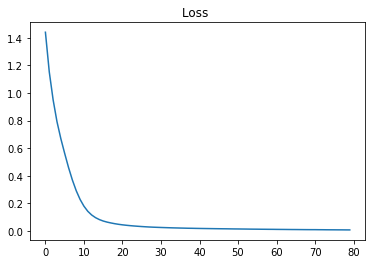

In [30]:
plt.plot(history.history['loss'])
plt.title('Loss ')
plt.show()

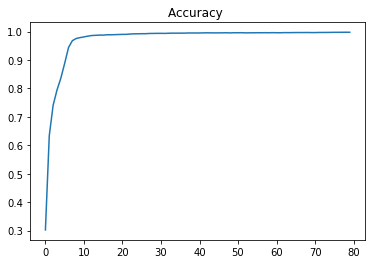

In [31]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy ')
plt.show()


In [32]:
accuracy_test = network.evaluate(X_test, y_test)

60/60 [==============================] - 0s 631us/step - loss: 0.0134 - accuracy: 0.9937


In [33]:
predictions = network.predict(X_test)

In [34]:
predictions[0]

array([1.7595294e-04, 2.3296209e-07, 9.5835446e-07, 9.9982291e-01],
      dtype=float32)

In [35]:
 y_test[0]

array([0., 0., 0., 1.], dtype=float32)

In [36]:
np.argmax(predictions[0])

3

In [37]:
print(df['Activity'][np.argmax(predictions[0])])

Sitting


In [38]:
df.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity
0,2021-02-15 13:50:21.550,-0.158969,2.803969,9.085058,-0.043932,-0.045130,0.045454,-19.597500,-5.601242,-41.832703,-90.007644,-15.340794,-0.056757,Sitting
1,2021-02-15 13:50:21.600,0.105081,2.691852,9.735305,-0.015150,0.017822,-0.039482,-19.790108,-5.628992,-41.756622,-90.030670,-15.489331,-0.163034,Sitting
2,2021-02-15 13:50:21.650,-0.065414,2.734813,9.690698,0.029210,-0.072317,0.006180,-19.635098,-5.536165,-42.205139,-90.047929,-15.306761,-0.206336,Sitting
3,2021-02-15 13:50:21.700,0.288300,2.505939,9.488469,0.007310,-0.021133,-0.040295,-19.892584,-5.790623,-41.786987,-90.010922,-15.431007,-0.321902,Sitting
4,2021-02-15 13:50:21.751,-0.041763,2.713407,9.748029,0.076889,-0.033310,-0.016419,-19.826864,-5.771675,-41.874054,-90.017554,-15.397740,-0.532236,Sitting


In [39]:
unseen_df= pd.read_csv('Product_Use_Data_Labeled.csv')

In [40]:
unseen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148777 entries, 0 to 148776
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Acceleration_Timestamp  148777 non-null  object 
 1   Acc_X                   148777 non-null  float64
 2   Acc_Y                   148777 non-null  float64
 3   Acc_Z                   148777 non-null  float64
 4   AngVelocity_Timestamp   148777 non-null  object 
 5   AngV_X                  148777 non-null  float64
 6   AngV_Y                  148777 non-null  float64
 7   AngV_Z                  148777 non-null  float64
 8   MagField_Timestamp      148777 non-null  object 
 9   Mag_X                   148777 non-null  float64
 10  Mag_Y                   148777 non-null  float64
 11  Mag_Z                   148777 non-null  float64
 12  Orientation_Timestamp   148777 non-null  object 
 13  Orin_X                  148777 non-null  float64
 14  Orin_Y              

In [41]:
print("Chatty-Dataset/Dataset Activities: ",unseen_df['Activity'].unique())
print("Aveen/Dataset Activities: ",df['Activity'].unique())

Chatty-Dataset/Dataset Activities:  ['Vibration' 'Sitting' 'Drop_n_Pickup' 'Standing' 'Walking'
 'Stationary_on_Table']
Aveen/Dataset Activities:  ['Sitting' 'Drop_Pickup' 'Standing' 'Walking']


In [42]:

unseen_df.drop(unseen_df[unseen_df['Activity'] == "Vibration" ].index , inplace=True)
unseen_df.drop(unseen_df[unseen_df['Activity'] == "Stationary_on_Table" ].index , inplace=True)




In [43]:
print("Chatty-Dataset/Dataset Activities: ",unseen_df['Activity'].unique())

Chatty-Dataset/Dataset Activities:  ['Sitting' 'Drop_n_Pickup' 'Standing' 'Walking']


In [44]:
print("Aveen/Dataset Activities: ",df['Activity'].unique())

Aveen/Dataset Activities:  ['Sitting' 'Drop_Pickup' 'Standing' 'Walking']


In [45]:
unseen_df = unseen_df.drop(['AngVelocity_Timestamp','AngVelocity_Timestamp','MagField_Timestamp','Orientation_Timestamp'],axis=1)

In [46]:
unseen_df.head()

,Acceleration_Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity
24558,10-11-2019 19:11:08.916,-0.128732,1.168919,9.667197,0.083513,0.014756,-0.007749,-0.019680,-7.374140,-36.550110,1.691646,-5.832974,2.204140,Sitting
24559,10-11-2019 19:11:08.926,-0.145947,1.184038,9.522897,0.079753,0.010685,-0.007234,-0.041904,-7.475231,-36.389626,1.691280,-5.883090,2.206025,Sitting
24560,10-11-2019 19:11:08.936,-0.158371,1.195564,9.448651,0.053968,0.007197,-0.007082,-0.041904,-7.475231,-36.389626,1.690119,-5.924144,2.205353,Sitting
24561,10-11-2019 19:11:08.946,-0.169298,1.211730,9.449849,0.017335,0.002895,-0.008939,-0.215164,-7.656757,-36.499084,1.688716,-5.946843,2.202901,Sitting
24562,10-11-2019 19:11:08.956,-0.144300,1.219364,9.495654,-0.016433,0.001976,-0.010027,-0.215164,-7.656757,-36.499084,1.686980,-5.949038,2.199171,Sitting


In [47]:
#unseen_df =unseen_df.drop("Unnamed: 0", axis=1)

In [48]:
unseen_df = unseen_df.dropna()

In [49]:
unseen_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99606 entries, 24558 to 124163
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Acceleration_Timestamp  99606 non-null  object 
 1   Acc_X                   99606 non-null  float64
 2   Acc_Y                   99606 non-null  float64
 3   Acc_Z                   99606 non-null  float64
 4   AngV_X                  99606 non-null  float64
 5   AngV_Y                  99606 non-null  float64
 6   AngV_Z                  99606 non-null  float64
 7   Mag_X                   99606 non-null  float64
 8   Mag_Y                   99606 non-null  float64
 9   Mag_Z                   99606 non-null  float64
 10  Orin_X                  99606 non-null  float64
 11  Orin_Y                  99606 non-null  float64
 12  Orin_Z                  99606 non-null  float64
 13  Activity                99606 non-null  object 
dtypes: float64(12), object(2)
memory 

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

UnS_Act_class = le.fit_transform(unseen_df['Activity'])

In [51]:
UnS_Act_class

array([1, 1, 1, ..., 3, 3, 3])

In [52]:
X_u= unseen_df.iloc[:, 1:-1].values
y_u = UnS_Act_class

In [53]:
X_u = sc.fit_transform(X_u)

In [54]:
# Encoding the classes 
y_u = np_utils.to_categorical(y_u)

In [55]:
y_u

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [56]:
X_u.shape

(99606, 12)

In [57]:
y_u.shape

(99606, 4)

In [58]:
Unseen_accuracy_test = network.evaluate(X_u, y_u)

3113/3113 [==============================] - 2s 594us/step - loss: 6.8388 - accuracy: 0.2404
